In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Data = pd.read_csv(r"C:\Users\abhes\OneDrive\Documents/Churn_Modelling.csv")
Data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
X = Data.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y = Data.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
Data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
gender = pd.get_dummies(X["Gender"],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
X = X.drop(['Geography','Gender'],axis = 1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
X = pd.concat([X,geography,gender],axis=1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
y_train.isnull().sum()

0

In [21]:
#importing basic libraies fro tenserflow and keras for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout

In [22]:
#Initialize ANN
classifier = Sequential()

In [23]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [66]:
#Adding the First Hidden Layer
classifier.add(Dense(units=7,activation='relu'))

In [67]:
#Adding the Second Hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [68]:
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [69]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
#learning rate bydefault adam uses 0.01

In [70]:
#To provide own learning rate
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [71]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [72]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 0.4218 - accuracy: 0.8209 - val_loss: 0.4098 - val_accuracy: 0.8383
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3975 - accuracy: 0.8433 - val_loss: 0.4147 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4052 - accuracy: 0.8328 - val_loss: 0.4234 - val_accuracy: 0.8069
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3976 - accuracy: 0.8216 - val_loss: 0.4114 - val_accuracy: 0.8273
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8541 - val_loss: 0.4081 - val_accuracy: 0.8349
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4019 - accuracy: 0.8268 - val_loss: 0.4102 - val_accuracy: 0.8186
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3960 - accuracy: 0.8545 - val_loss: 0.4198 - val_accuracy:

In [73]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

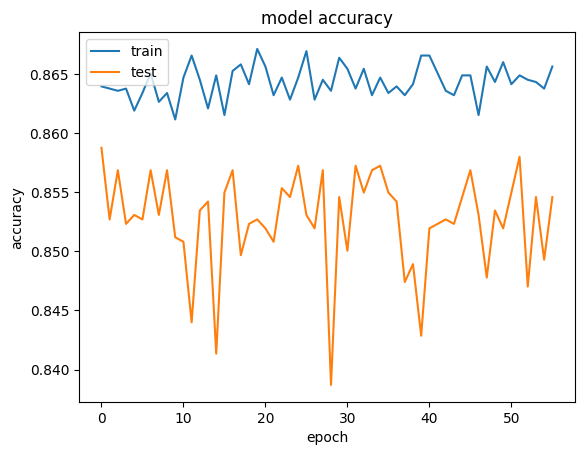

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

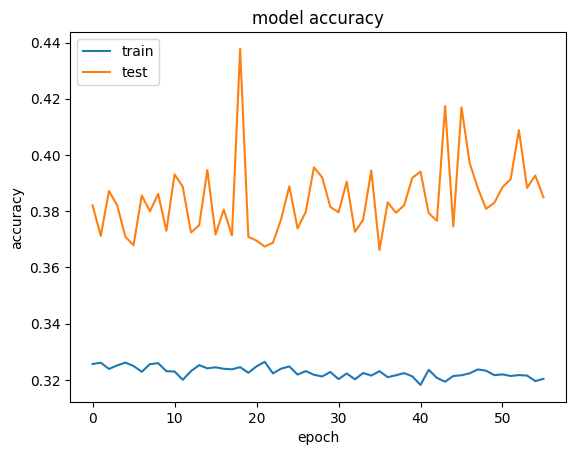

In [43]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [45]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_pred)
conf

array([[1499,   96],
       [ 186,  219]], dtype=int64)

In [54]:
acc = accuracy_score(y_test,y_pred)
acc*100

85.9

In [56]:
classifier.get_weights()

[array([[-3.97142544e-02,  1.10185280e-01, -1.08969891e+00,
         -3.49719599e-02, -6.13109529e-01,  4.11704928e-01,
          2.52808714e+00, -7.03812897e-01,  4.70508188e-01,
          7.40868807e-01, -3.30871344e-03],
        [ 1.70765483e+00,  4.68394041e+00,  1.23080993e+00,
          3.70857328e-01, -1.74936533e-01, -2.05138803e+00,
         -1.46947134e+00,  4.23385668e+00, -1.81522191e+00,
         -2.57329273e+00, -2.76594424e+00],
        [-3.76567453e-01, -1.09067306e-01,  1.29515409e+00,
          7.71692932e-01, -2.76867181e-01, -6.77764714e-01,
         -1.80035377e+00, -3.20673734e-02,  1.00023460e+00,
         -5.48370719e-01, -3.67391050e-01],
        [ 7.04007804e-01, -2.59355009e-01, -7.82285571e-01,
         -2.18684649e+00, -2.04341248e-01, -5.58343840e+00,
         -2.38787842e+00, -2.81758642e+00, -3.31149745e+00,
         -3.82969260e+00, -1.24755597e+00],
        [ 5.47414923e+00,  1.32618916e+00,  1.26423562e+00,
         -6.68119371e-01,  5.92363954e-01, -